# Flower classification based on decision trees

# 1. Introduction to the Experiment Background

Through our previous studies, we have roughly understood the basic principles of decision trees, including the three criteria for generating decision trees: information gain and the Gini index. Next, we will apply these principles to real-life situations to solve some classification problems. We know that there are a vast number of flower species. Upon entering a flower market, one is greeted with a dazzling array of flowers. Some flowers of the same species can have up to hundreds of types, making it difficult to distinguish them with the naked eye without careful observation. The well-known Iris flower is one such species. Below, we will use the decision tree algorithm to train a model with a dataset of three types of Iris flowers, achieving classification through the characteristics of the Iris.

# 2. Introduction to the Scene

The iris, originally from Europe and the national flower of France, is large and beautiful with lush, green leaves, making it highly valued for ornamental purposes. There are over 300 species of iris. Can we distinguish them through some of their significant features? Through observation, we find that there are noticeable differences in the size of the petals and sepals among the three types of iris: Setosa, Versicolor, and Virginica, as shown in the figure below.

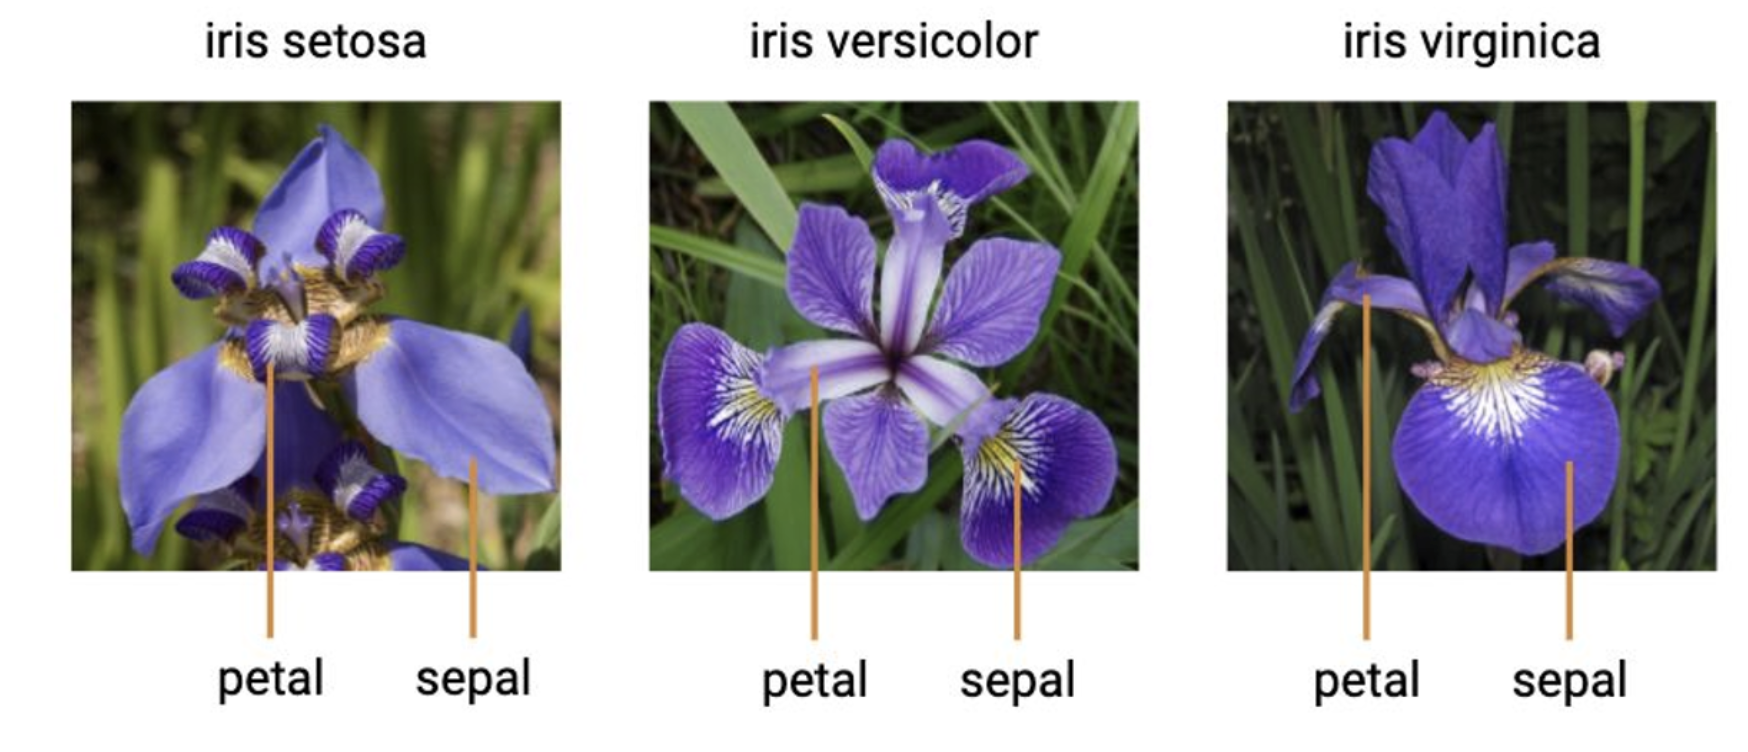
In this project, we will construct a decision tree model using the decision tree classification algorithm, based on the size characteristics of the petals and sepals of three types of iris flowers, to solve a three-class classification problem.

# 3、Project Tasks and Solutions

This project builds a decision tree model using the decision tree algorithm based on the lengths and widths of the sepals and petals of three types of iris flowers, as well as their corresponding species, to classify these three types of iris flowers. Through the experiments in this project, students can learn how to use the sklearn library to build a decision tree model, train the model, optimize it, and evaluate it.

The dataset used in this project comes from sklearn and can be directly called for use. First, the dataset is imported and divided into training and testing sets in an 8:2 ratio for model training. Then, upon evaluating the model, it is found that the model's fit is not ideal, and its accuracy is also relatively low. To avoid overfitting, it is necessary to reduce the decision tree's degrees of freedom during the training process, perform regularization, and then evaluate the model again.


# 4. Experimental Steps

The experiment is divided into four steps. 
1. Import the dataset from sklearn and divide it. 
2. Build a decision tree classifier for model training. 
3. Evaluate the decision model. 
4. Regularize hyperparameters and evaluate the model after regularization.



## 4.1 Import and Split the Dataset

First, import the Iris dataset from sklearn, and divide the dataset into training and testing sets according to the set ratio. For the sake of visualization, this experiment only uses two features of the Iris flower. The implementation code is as follows:


In [2]:
# Import necessary libraries
from sklearn.datasets import load_iris  # Import iris dataset from the sklearn dataset
from sklearn.model_selection import train_test_split # Import dataset splitting function train_test_split()

# Import iris dataset
iris = load_iris() 
x = iris['data'][:, [0, 1]] # Attribute values of each feature. For visualization purposes, only two features of the iris flower are taken here.
y = iris['target'] # Labels of each sample

# Split the dataset into training and testing sets in an 8:2 ratio
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2) 
target_names = iris.target_names # Labels of samples
feature_names = iris.feature_names # Data features


This dataset contains a total of 4 feature variables and 1 categorical variable, with 150 samples in total. The 4 feature variables are the lengths and widths of the sepals and petals, and the categorical variable represents the three types of iris flowers: Setosa, Versicolor, and Virginica. To display a portion of the dataset, run the code below.

In [3]:
# Print the size of the label samples
print('Size of label samples: {}'.format(y.shape))
print(y)

# Print the size of the attribute value dataset
print('Size of attribute value dataset: {}'.format(x.shape))
print(x)

Size of label samples: (150,)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
Size of attribute value dataset: (150, 2)
[[5.1 3.5]
 [4.9 3. ]
 [4.7 3.2]
 [4.6 3.1]
 [5.  3.6]
 [5.4 3.9]
 [4.6 3.4]
 [5.  3.4]
 [4.4 2.9]
 [4.9 3.1]
 [5.4 3.7]
 [4.8 3.4]
 [4.8 3. ]
 [4.3 3. ]
 [5.8 4. ]
 [5.7 4.4]
 [5.4 3.9]
 [5.1 3.5]
 [5.7 3.8]
 [5.1 3.8]
 [5.4 3.4]
 [5.1 3.7]
 [4.6 3.6]
 [5.1 3.3]
 [4.8 3.4]
 [5.  3. ]
 [5.  3.4]
 [5.2 3.5]
 [5.2 3.4]
 [4.7 3.2]
 [4.8 3.1]
 [5.4 3.4]
 [5.2 4.1]
 [5.5 4.2]
 [4.9 3.1]
 [5.  3.2]
 [5.5 3.5]
 [4.9 3.6]
 [4.4 3. ]
 [5.1 3.4]
 [5.  3.5]
 [4.5 2.3]
 [4.4 3.2]
 [5.  3.5]
 [5.1 3.8]
 [4.8 3. ]
 [5.1 3.8]
 [4.6 3.2]
 [5.3 3.7]
 [5.  3.3]
 [7.  3.2]
 [6.4 3.2]
 [6.9 3.1]
 [5.5 2.3]
 [6.5 2.8]
 [5.7 2.8]
 [6.3 

## 4.2 Model Training

Creating the classifier and training the model are key parts of this project. In this section, we need to complete feature selection for the dataset, generate the decision tree, and prune the decision tree (this part is addressed in the model optimization section). The necessary code for these tasks is encapsulated within a class named DecisionTreeClassifier in sklearn.tree. We can directly call this class, setting the criterion parameter to either gini or entropy. The former uses the Gini coefficient, while the latter uses information gain; different parameters correspond to different algorithms, with the former being the CART algorithm and the latter being ID3. The implementation code for this part is as follows.

After running the code, two decision tree classifiers begin training based on information gain and the Gini coefficient as the criteria for feature selection, respectively.


In [4]:
# Import Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier  

# 1. Instantiate a classifier based on entropy for classification
clf_en = DecisionTreeClassifier(criterion='entropy') 
# Train the classifier using entropy as the feature splitting criterion on the training set, fit the decision tree model
clf_en = clf_en.fit(x_train, y_train) 

# 2. Instantiate a classifier based on Gini impurity for classification
clf_gi = DecisionTreeClassifier(criterion='gini')  
# Train the classifier using Gini impurity as the feature splitting criterion on the training set, fit the decision tree model
clf_gi = clf_gi.fit(x_train, y_train) 

## 4.3、Model Evaluation

Evaluate the two decision tree models without regularized hyperparameters using the average accuracy and confusion matrix. The average accuracy for the test and training sets can be viewed through clf_en.score. The classification results of the confusion matrix can be obtained through confusion_matrix(). The code implementation is as follows:


In [5]:
# Define a model evaluation function
def evaluate(x_test, y_test, x_train, y_train, clf):
    # View the average accuracy on the given test data and labels
    acc_test = clf.score(x_test, y_test)
    acc_train = clf.score(x_train, y_train)
    print('Average accuracy on the test set: {}'.format(acc_test))
    print('Average accuracy on the training set: {}'.format(acc_train))

    # Use the confusion matrix to view the classification results
    from sklearn.metrics import confusion_matrix  # Import the confusion matrix calculation function
    y_pred = clf.predict(x_test)
    print('Confusion matrix')
    print(confusion_matrix(y_test, y_pred))  # Print out the classification results of the confusion matrix


Run the following code to call the defined model evaluation function to assess the model and print out the evaluation results:

In [6]:
print('Evaluation based on entropy as the feature splitting criterion:')
evaluate(x_test, y_test, x_train, y_train, clf_en)
print('Evaluation based on Gini impurity as the feature splitting criterion:')
evaluate(x_test, y_test, x_train, y_train, clf_gi)

Evaluation based on entropy as the feature splitting criterion:
Average accuracy on the test set: 0.6333333333333333
Average accuracy on the training set: 0.95
Confusion matrix
[[8 1 0]
 [0 7 5]
 [0 5 4]]
Evaluation based on Gini impurity as the feature splitting criterion:
Average accuracy on the test set: 0.6666666666666666
Average accuracy on the training set: 0.95
Confusion matrix
[[9 0 0]
 [0 7 5]
 [0 5 4]]



From the model evaluation metrics, it's evident that the model trained without regularization is overly complex, leading to overfitting and poor generalization performance. Next, we will regularize by tuning the hyperparameters, which is commonly referred to as decision tree pruning.

## 4.4、Regularizing Hyperparameters

To avoid overfitting, it's necessary to reduce the decision tree's degrees of freedom during the training process. This is known as regularization. We usually use the following parameters in the sklearn.tree.DecisionTreeClassifier class to limit the decision tree's degrees of freedom.

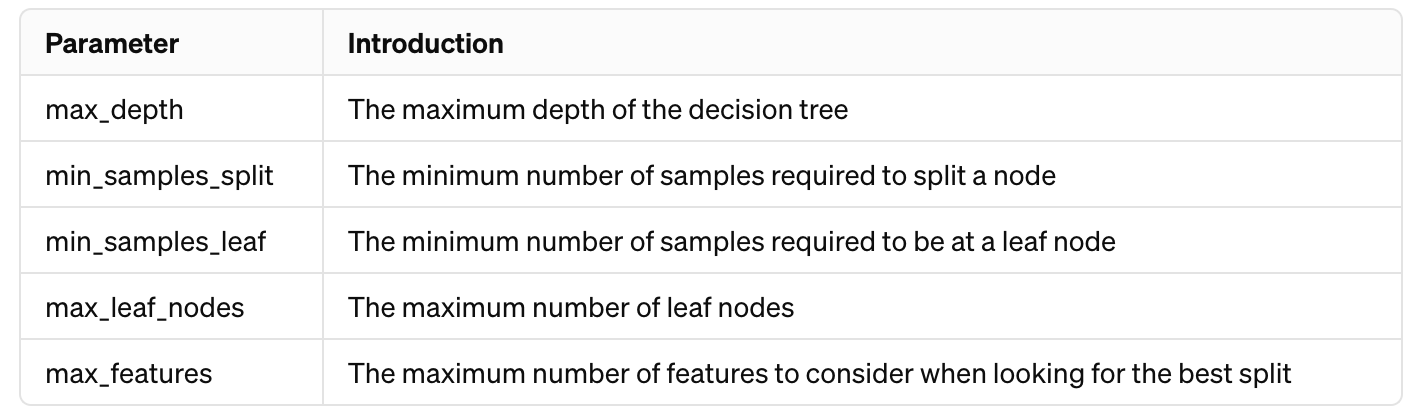

Next, we will use the control variable method to change each variable from 1 to 10 in steps of 1, and calculate the accuracy of the test and training sets under this parameter. The implementation code is as follows:

## 4.4.1、Model Training


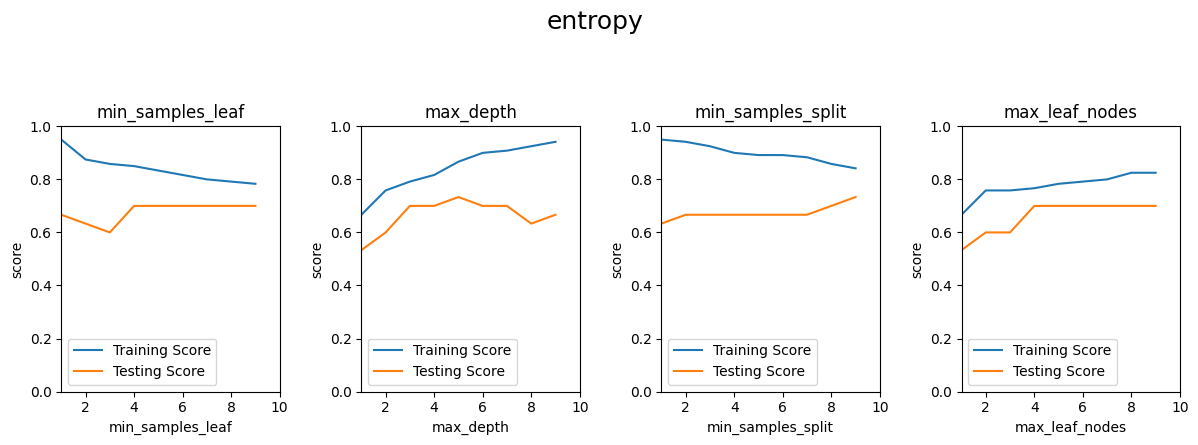

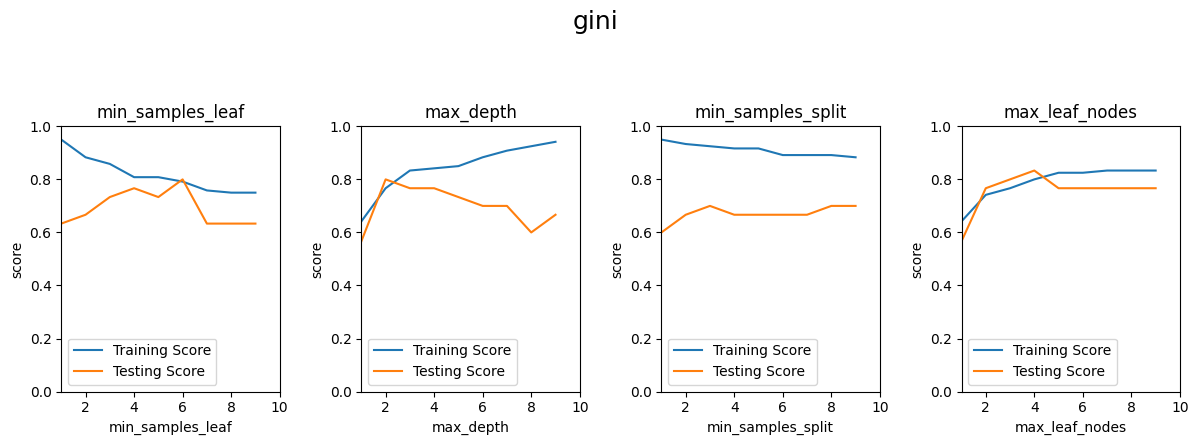

In [7]:
# Define a model training function
import numpy as np
import matplotlib.pyplot as plt  # Use matplotlib for visualization

def train(x_train, y_train, x_test, y_test, a, b, c, d, e, f):
    # Instantiate a classifier
    clf = DecisionTreeClassifier(criterion=a,
                                 splitter=b,
                                 min_samples_leaf=c,
                                 max_depth=d,
                                 min_samples_split=e,
                                 max_leaf_nodes=f)
    clf.fit(x_train, y_train) # Fit the model based on the training set
    # Evaluate the accuracy of the model on the training and testing sets and store them in lists
    train_scores.append(clf.score(x_train, y_train)) 
    test_scores.append(clf.score(x_test, y_test))
    return train_scores, test_scores

x_range = np.arange(1, 10, 1) # Define the range and stride of the parameter changes

# Plotting
# Names of each subplot
title_name = ["min_samples_leaf", "max_depth", "min_samples_split", "max_leaf_nodes"]

for k in range(1, 3):
    if k == 1:
        a = 'entropy'
        fig = plt.figure(num=1, figsize=(15, 4))
        plt.suptitle('entropy', x=0.4, y=1.1, fontsize=18)
    if k == 2:
        a = 'gini'
        fig = plt.figure(num=2, figsize=(15, 4))
        plt.suptitle('gini', x=0.4, y=1.1, fontsize=18)
    for t in range(1, 5):
        train_scores = []
        test_scores = []
        for i in range(1, 10):
            if t == 1:
                c = i; d = None; e = 2; f = None
            if t == 2:
                c = 1; d = i; e = 2; f = None
            if t == 3:
                c = 1; d = None; e = i + 1; f = None
            if t == 4:
                c = 1; d = None; e = 2; f = i + 1
            # Call the function for training
            train_scores, test_scores = train(x_train, y_train, x_test, y_test, a, 'best', c, d, e, f)
        ax = plt.subplot(1, 5, t) # Create a subplot
        # Plot the curve of model training scores on the training and testing sets as the parameter changes
        ax.plot(x_range, train_scores, label="Training Score")
        ax.plot(x_range, test_scores, label="Testing Score")
        ax.set_xlabel(title_name[t - 1])
        ax.set_ylabel("score")
        ax.set_ylim(0, 1.0)
        ax.set_xlim(1, 10)
        ax.set_title(title_name[t - 1])
        ax.legend(loc="best")
    plt.tight_layout()
    plt.show()

Assuming we use the letters c, d, e, and f to represent min_samples_leaf, max_depth, min_samples_split, and max_leaf_nodes respectively, the obtained figure through the method of controlling variables shows the following: the first column keeps d, e, and f constant and illustrates the variation curve between c (min_samples_leaf) and score; the second column keeps c, e, and f constant, showing the variation curve between d (max_depth) and score; the third column keeps c, d, and f constant, depicting the variation curve between e (min_samples_split) and score; the fourth column keeps c, d, and e constant, presenting the variation curve between f (max_leaf_nodes) and score. From the entropy criteria, it can be roughly observed that the optimal values for min_samples_leaf, max_depth, min_samples_split, and max_leaf_nodes are 6, 8, 2, and 8 respectively. Similarly, from the gini criteria, the optimal values for these parameters can be roughly observed to be 6, 9, 2, and 8 respectively.

Based on the optimal hyperparameter values identified from the analysis above, set the hyperparameters accordingly and retrain the model. The implementation code is as follows:

In [8]:
# 1. Instantiate a classifier based on entropy for classification
clf_en = DecisionTreeClassifier(criterion='entropy',
                                splitter='best',
                                max_depth=6,
                                max_leaf_nodes=8,
                                min_samples_leaf=2,
                                min_samples_split=8) 
# Fit the model based on the training set (x_train, y_train)
clf_en = clf_en.fit(x_train, y_train) 

# 2. Instantiate a classifier based on Gini impurity for classification
clf_gi = DecisionTreeClassifier(criterion='gini',
                                splitter='best',
                                max_depth=6,
                                min_samples_split=9,
                                min_samples_leaf=2,
                                max_leaf_nodes=8)  
# Fit the model based on the training set (x_train, y_train)
clf_gi = clf_gi.fit(x_train, y_train) 

### 4.4.2、Model Evaluation

Once again, evaluate the two types of decision tree models with regularized hyperparameters using average accuracy and the confusion matrix. The code implementation is as follows:


In [9]:
print('Evaluation based on entropy as the feature splitting criterion:')
# Call the defined evaluation function, evaluate the model as: clf_en
evaluate(x_test, y_test, x_train, y_train, clf_en) 
print('Evaluation based on Gini impurity as the feature splitting criterion:') 
# Call the defined evaluation function, evaluate the model as: clf_gi
evaluate(x_test, y_test, x_train, y_train, clf_gi)

Evaluation based on entropy as the feature splitting criterion:
Average accuracy on the test set: 0.7
Average accuracy on the training set: 0.8083333333333333
Confusion matrix
[[8 0 1]
 [1 7 4]
 [0 3 6]]
Evaluation based on Gini impurity as the feature splitting criterion:
Average accuracy on the test set: 0.7666666666666667
Average accuracy on the training set: 0.825
Confusion matrix
[[9 0 0]
 [0 8 4]
 [0 3 6]]


After regularizing the hyperparameters, the complexity of the model has decreased, and the phenomenon of overfitting has been alleviated. The models trained with two different feature selection strategies also show differences. You can also try adjusting different combinations of hyperparameters to observe the results.